In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import interpolate

In [2]:
R = 1.987         #cal/mol * K                  
T0 = 300          #K
Hrx = -30000      #cal/mol                     
CpA = 25          #cal/mol * K                      
CpB = 25          #cal/mol * K                      
CpC = 25          #cal/mol * K
CpD = 25          #cal/mol * K
K_C1 = 500000     #@298K
T1 = 298          #K

In [3]:
#defining all the functions

def Kc(T):
    Kc_T = K_C1 * np.exp((Hrx / R) * ((1 / T1) - (1 / T)))
    return Kc_T

def Xe(Kc):
    Xe= (Kc ** (1/2)) / ((Kc ** (1/2)) + 1)
    return Xe

def XEB(T):
    XEB = ((CpA + CpB) * (T - T0)) / (-Hrx)
    return XEB

def T_90_XEB(X_EB):
    T_90_temp = (((X_EB * (-Hrx)) / ((CpA + CpB)))) + T0
    return T_90_temp

In [4]:
#for reactor 1

T_range = np.arange(300, 600, 1)

K_C = Kc(T_range)
X_e = Xe(K_C)
X_EB = XEB(T_range)

for i in range(len(T_range)):
    temp1 = X_EB[i]
    temp2 = X_e[i]
    if (round(temp1, 2) == round(temp2, 2)):
        X_100 = X_e[i]
        print('Conversion assuming 100% efficiency (reactor 1)', X_100)
        break
        
X_90 = 0.9 * X_100
print('Conversion achieved with 90% efficiency (reactor 2)', X_90)
T_90 = T_90_XEB(X_90)
print('Corresponding Exit temperature (reactor 1)', T_90)

Conversion assuming 100% efficiency (reactor 1) 0.22165922420306527
Conversion achieved with 90% efficiency (reactor 2) 0.19949330178275876
Corresponding Exit temperature (reactor 1) 419.69598106965526


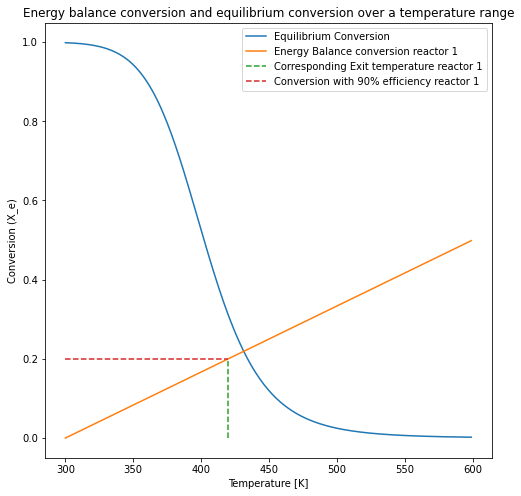

In [5]:
plt.figure(figsize=(8,8))


plt.plot(T_range, X_e, label = 'Equilibrium Conversion')
plt.plot(T_range, X_EB, label = 'Energy Balance conversion reactor 1')

plt.plot([T_90, T_90], [0, X_90], label = 'Corresponding Exit temperature reactor 1', linestyle = 'dashed')
plt.plot([300, T_90], [X_90, X_90], label = 'Conversion with 90% efficiency reactor 1 ', linestyle = 'dashed')


plt.title('Energy balance conversion and equilibrium conversion over a temperature range')
plt.xlabel('Temperature [K]')
plt.ylabel('Conversion (X_e)')

plt.legend() 

In [6]:
#for reactor 2

for i in range(len(T_range)):
    temp1 = X_EB[i] + X_90
    temp2 = X_e[i]
    if (round(temp1, 2) == round(temp2, 2)):
        X_100_2 = X_e[i]
        print('Conversion assuming 100% efficiency (reactor 2)', X_100_2)
        break
        
X_90_2 = 0.9 * X_100_2
print('Conversion achieved with 90% efficiency (reactor 2)', X_90_2)
T_90_2 = T_90_XEB(X_90_2 - X_90)
print('Corresponding Exit temperature (reactor 2)', T_90_2)

Conversion assuming 100% efficiency (reactor 2) 0.38976941763398093
Conversion achieved with 90% efficiency (reactor 2) 0.3507924758705828
Corresponding Exit temperature (reactor 2) 390.7795044526944


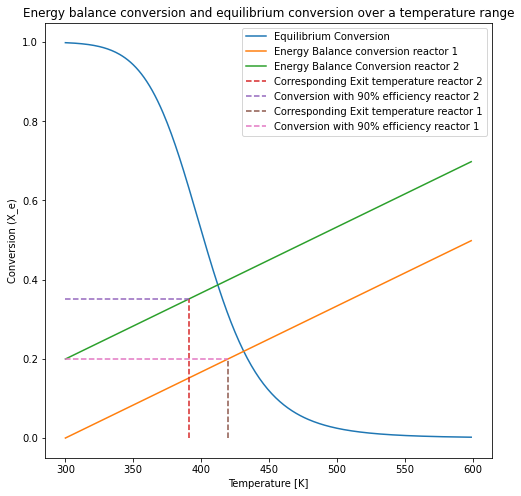

In [7]:
plt.figure(figsize=(8,8))


plt.plot(T_range, X_e, label = 'Equilibrium Conversion')
plt.plot(T_range, X_EB, label = 'Energy Balance conversion reactor 1')

plt.plot(T_range, XEB(T_range) + X_90, label = 'Energy Balance Conversion reactor 2')

plt.plot([T_90_2, T_90_2], [0, X_90_2], label = 'Corresponding Exit temperature reactor 2', linestyle = 'dashed')
plt.plot([300, T_90_2], [X_90_2, X_90_2], label = 'Conversion with 90% efficiency reactor 2 ', linestyle = 'dashed')

plt.plot([T_90, T_90], [0, X_90], label = 'Corresponding Exit temperature reactor 1', linestyle = 'dashed')
plt.plot([300, T_90], [X_90, X_90], label = 'Conversion with 90% efficiency reactor 1 ', linestyle = 'dashed')


plt.title('Energy balance conversion and equilibrium conversion over a temperature range')
plt.xlabel('Temperature [K]')
plt.ylabel('Conversion (X_e)')

plt.legend() 